# Question 3

### Conduct exploratory data analysis to identify crucial features that will be utilized in the model.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('autos.csv')

C:\Users\Sanjana\AppData\Local\Temp\ipykernel_43704\52197313.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('autos.csv')


The number of rows and column in the file.

In [3]:
df.shape

(371540, 20)

In [4]:
df.index

RangeIndex(start=0, stop=371540, step=1)

In [5]:
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371540 entries, 0 to 371539
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   dateCrawled          371539 non-null  object 
 1   name                 371539 non-null  object 
 2   seller               371538 non-null  object 
 3   offerType            371538 non-null  object 
 4   price                371538 non-null  float64
 5   abtest               371538 non-null  object 
 6   vehicleType          333669 non-null  object 
 7   yearOfRegistration   371537 non-null  float64
 8   gearbox              351329 non-null  object 
 9   powerPS              371538 non-null  float64
 10  model                351054 non-null  object 
 11  kilometer            371538 non-null  object 
 12  monthOfRegistration  371537 non-null  float64
 13  fuelType             338151 non-null  object 
 14  brand                371537 non-null  object 
 15  notRepairedDamage

In [7]:
df.describe()

,price,yearOfRegistration,powerPS,monthOfRegistration,nrOfPictures,postalCode
count,3.715380e+05,371537.000000,371538.000000,371537.000000,371537.0,371537.000000
mean,1.729544e+04,2004.577883,115.548840,5.734473,0.0,50820.666402
std,3.587905e+06,92.865496,192.137238,3.712383,0.0,25799.080292
min,0.000000e+00,1000.000000,0.000000,0.000000,0.0,1067.000000
25%,1.150000e+03,1999.000000,70.000000,3.000000,0.0,30459.000000
50%,2.950000e+03,2003.000000,105.000000,6.000000,0.0,49610.000000
75%,7.200000e+03,2008.000000,150.000000,9.000000,0.0,71546.000000
max,2.147484e+09,9999.000000,20000.000000,12.000000,0.0,99998.000000


From df. describe we can observe,
1. min of yearOfRegistration is 1000
2. max of yearOfRegistration is 9999
3. min of monthOfRegistration is 0

We can drop the rows that will not be possible logically.

In [8]:
df.drop(df[df.yearOfRegistration<1800].index, inplace = True)

In [9]:
df.drop(df[df.yearOfRegistration>2023].index, inplace = True)

In [10]:
df.drop(df[df.monthOfRegistration==0].index, inplace = True)

In [11]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
1,24-03-2016 10:58,A5_Sportback_2.7_Tdi,privat,Angebot,18300.0,test,coupe,2011.0,manuell,190.0,NaN,125000,5.0,diesel,audi,ja,24-03-2016 00:00,0.0,66954.0,07-04-2016 01:46
2,14-03-2016 12:52,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800.0,test,suv,2004.0,automatik,163.0,grand,125000,8.0,diesel,jeep,NaN,14-03-2016 00:00,0.0,90480.0,05-04-2016 12:47
3,17-03-2016 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000,6.0,benzin,volkswagen,nein,17-03-2016 00:00,0.0,91074.0,17-03-2016 17:40
4,31-03-2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000,7.0,diesel,skoda,nein,31-03-2016 00:00,0.0,60437.0,06-04-2016 10:17
5,04-04-2016 17:36,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650.0,test,limousine,1995.0,manuell,102.0,3er,150000,10.0,benzin,bmw,ja,04-04-2016 00:00,0.0,33775.0,06-04-2016 19:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371535,14-03-2016 17:48,Suche_t4___vito_ab_6_sitze,privat,Angebot,2200.0,test,NaN,2005.0,NaN,0.0,NaN,20000,1.0,NaN,sonstige_autos,NaN,14-03-2016 00:00,0.0,39576.0,06-04-2016 00:46
371536,05-03-2016 19:56,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199.0,test,cabrio,2000.0,automatik,101.0,fortwo,125000,3.0,benzin,smart,nein,05-03-2016 00:00,0.0,26135.0,11-03-2016 18:17
371537,19-03-2016 18:57,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200.0,test,bus,1996.0,manuell,102.0,transporter,150000,3.0,diesel,volkswagen,nein,19-03-2016 00:00,0.0,87439.0,07-04-2016 07:15
371538,20-03-2016 19:41,VW_Golf_Kombi_1_9l_TDI,privat,Angebot,3400.0,test,kombi,2002.0,manuell,100.0,golf,150000,6.0,diesel,volkswagen,NaN,20-03-2016 00:00,0.0,40764.0,24-03-2016 12:45


In [12]:
df.describe()

,price,yearOfRegistration,powerPS,monthOfRegistration,nrOfPictures,postalCode
count,3.338230e+05,333822.000000,333823.000000,333822.000000,333822.0,333822.000000
mean,1.605089e+04,2003.564346,120.577081,6.381709,0.0,51185.544503
std,3.754281e+06,7.419682,184.615545,3.347750,0.0,25750.446681
min,0.000000e+00,1800.000000,0.000000,1.000000,0.0,1067.000000
25%,1.300000e+03,1999.000000,75.000000,4.000000,0.0,30916.000000
50%,3.300000e+03,2004.000000,110.000000,6.000000,0.0,50170.000000
75%,7.800000e+03,2008.000000,150.000000,9.000000,0.0,72076.000000
max,2.147484e+09,2019.000000,20000.000000,12.000000,0.0,99998.000000


In [13]:
df.sample(10)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
82051,23-03-2016 17:48,Audi_A6_combi,privat,Angebot,1350.0,control,kombi,2000.0,manuell,150.0,a6,150000,3.0,diesel,audi,nein,23-03-2016 00:00,0.0,90763.0,25-03-2016 01:44
59259,09-03-2016 18:50,Volkswagen_Caddy_1.9_TDI__5_Si.__+_TÜV_+_Gruen...,privat,Angebot,3800.0,control,kombi,2006.0,manuell,75.0,caddy,150000,5.0,diesel,volkswagen,nein,09-03-2016 00:00,0.0,55120.0,29-03-2016 05:45
134730,12-03-2016 13:41,VW_EOS_2.0_TDI,privat,Angebot,5000.0,control,NaN,2017.0,NaN,140.0,eos,150000,10.0,diesel,volkswagen,NaN,12-03-2016 00:00,0.0,33602.0,12-03-2016 13:41
240458,05-03-2016 17:38,Audi_Q3_2.0_TDI,privat,Angebot,22800.0,test,limousine,2013.0,manuell,140.0,q3,40000,5.0,diesel,audi,nein,05-03-2016 00:00,0.0,94249.0,10-03-2016 12:16
262236,16-03-2016 13:37,Super_Auto_fuer_alles_auf_was_man_so_Lust_hat,privat,Angebot,13000.0,control,suv,2010.0,manuell,140.0,kuga,150000,7.0,diesel,ford,NaN,16-03-2016 00:00,0.0,79650.0,06-04-2016 12:45
115100,05-03-2016 14:49,Volkswagen_Golf_1.4_TÜV_AU_NEU__SCHECKHEFTGEPF...,privat,Angebot,1990.0,control,limousine,2002.0,manuell,75.0,golf,150000,10.0,benzin,volkswagen,nein,05-03-2016 00:00,0.0,38259.0,05-03-2016 18:45
290258,14-03-2016 16:51,Mercedes_Benz_S_500,privat,Angebot,2900.0,test,limousine,2000.0,automatik,306.0,s_klasse,150000,7.0,benzin,mercedes_benz,nein,14-03-2016 00:00,0.0,50739.0,23-03-2016 17:18
119215,19-03-2016 14:37,Beetle_Cabriolet__Disign_1_2_TSI____Silber_Met...,privat,Angebot,19750.0,test,cabrio,2013.0,manuell,105.0,beetle,20000,7.0,benzin,volkswagen,nein,19-03-2016 00:00,0.0,46342.0,06-04-2016 11:46
230185,27-03-2016 20:56,Mercedes_Benz_C_200_Kompressor_Sportcoupe,privat,Angebot,4800.0,control,coupe,2001.0,automatik,163.0,c_klasse,150000,5.0,benzin,mercedes_benz,nein,27-03-2016 00:00,0.0,69126.0,05-04-2016 20:17
325077,03-04-2016 17:44,Renault_Espace_2.0,privat,Angebot,1750.0,test,bus,2001.0,manuell,140.0,espace,150000,4.0,benzin,renault,nein,03-04-2016 00:00,0.0,96215.0,05-04-2016 17:26


In [14]:
df.dropna(inplace = True)

To get precise data, we can drop the rows that contain NULL values.

In [15]:
df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
3,17-03-2016 16:54,GOLF_4_1_4__3TÜRER,privat,Angebot,1500.0,test,kleinwagen,2001.0,manuell,75.0,golf,150000,6.0,benzin,volkswagen,nein,17-03-2016 00:00,0.0,91074.0,17-03-2016 17:40
4,31-03-2016 17:25,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600.0,test,kleinwagen,2008.0,manuell,69.0,fabia,90000,7.0,diesel,skoda,nein,31-03-2016 00:00,0.0,60437.0,06-04-2016 10:17
5,04-04-2016 17:36,BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...,privat,Angebot,650.0,test,limousine,1995.0,manuell,102.0,3er,150000,10.0,benzin,bmw,ja,04-04-2016 00:00,0.0,33775.0,06-04-2016 19:17
6,01-04-2016 20:48,Peugeot_206_CC_110_Platinum,privat,Angebot,2200.0,test,cabrio,2004.0,manuell,109.0,2_reihe,150000,8.0,benzin,peugeot,nein,01-04-2016 00:00,0.0,67112.0,05-04-2016 18:18
7,21-03-2016 18:54,VW_Derby_Bj_80__Scheunenfund,privat,Angebot,0.0,test,limousine,1980.0,manuell,50.0,andere,40000,7.0,benzin,volkswagen,nein,21-03-2016 00:00,0.0,19348.0,25-03-2016 16:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371532,19-03-2016 19:53,turbo_defekt,privat,Angebot,3200.0,control,limousine,2004.0,manuell,225.0,leon,150000,5.0,benzin,seat,ja,19-03-2016 00:00,0.0,96465.0,19-03-2016 20:44
371533,27-03-2016 20:36,Opel_Zafira_1.6_Elegance_TÜV_12/16,privat,Angebot,1150.0,control,bus,2000.0,manuell,0.0,zafira,150000,3.0,benzin,opel,nein,27-03-2016 00:00,0.0,26624.0,29-03-2016 10:17
371536,05-03-2016 19:56,Smart_smart_leistungssteigerung_100ps,privat,Angebot,1199.0,test,cabrio,2000.0,automatik,101.0,fortwo,125000,3.0,benzin,smart,nein,05-03-2016 00:00,0.0,26135.0,11-03-2016 18:17
371537,19-03-2016 18:57,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Angebot,9200.0,test,bus,1996.0,manuell,102.0,transporter,150000,3.0,diesel,volkswagen,nein,19-03-2016 00:00,0.0,87439.0,07-04-2016 07:15


### Visualize the count of various columns

In [16]:
import matplotlib.pyplot as plt

In [17]:
df.vehicleType.unique()

array(['kleinwagen', 'limousine', 'cabrio', 'kombi', 'suv', 'bus',
       'coupe', 'andere'], dtype=object)

In [18]:
vehicleTypeCount = df.vehicleType.value_counts()

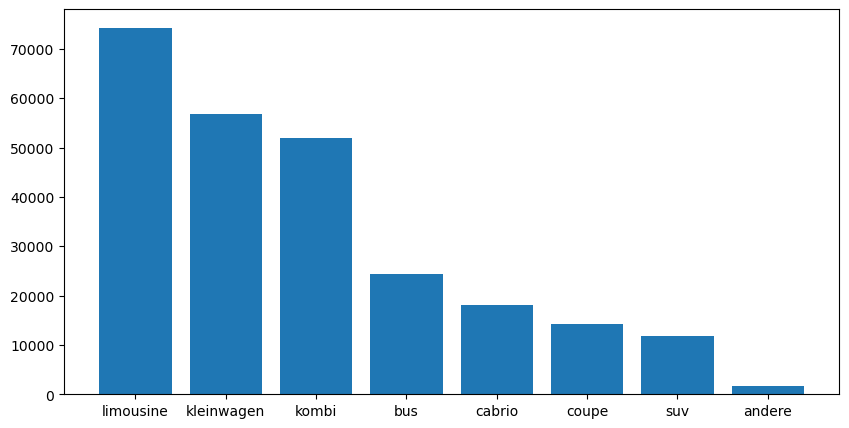

In [19]:
plt.figure(figsize = (10,5))
plt.bar(vehicleTypeCount.index, vehicleTypeCount)
plt.show()

In [20]:
years = df.yearOfRegistration.value_counts()
type(years)

pandas.core.series.Series

### To find the year with the highest and lowest frequency

In [21]:
print(years.min(),years.idxmin())

1 1949.0


In [22]:
brands = df.brand.value_counts()

In [23]:
print(years.max(),years.idxmax())

16583 2006.0


### Frequency of automobile brands

In [24]:
brands

volkswagen       52377
bmw              29573
mercedes_benz    26363
opel             25311
audi             24208
ford             16805
renault          11212
peugeot           7631
fiat              6138
seat              4888
skoda             4482
mazda             3901
toyota            3637
citroen           3618
nissan            3507
smart             3277
mini              2856
hyundai           2743
volvo             2507
mitsubishi        2003
kia               1939
honda             1879
porsche           1851
alfa_romeo        1644
suzuki            1639
chevrolet         1300
chrysler           996
dacia              717
land_rover         629
jeep               602
subaru             526
daihatsu           499
jaguar             484
saab               408
daewoo             327
lancia             309
rover              255
trabant            182
lada               139
Name: brand, dtype: int64

In [25]:
models = df.model.value_counts()

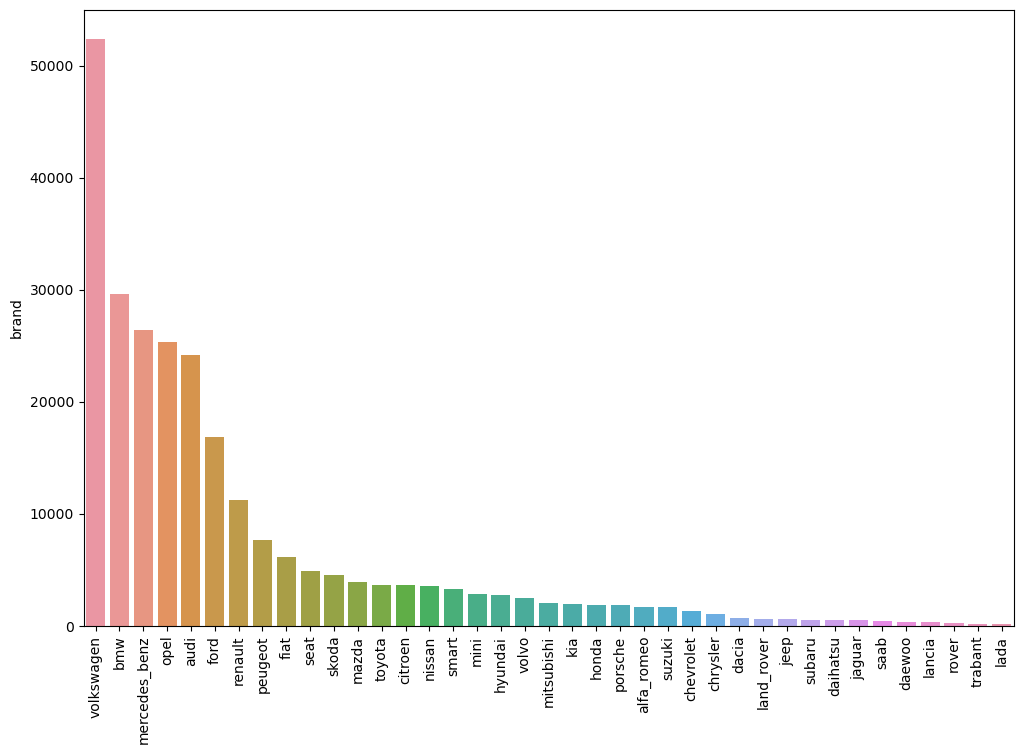

In [26]:
import seaborn as sns
plt.figure(figsize=(12,8))
plt.xticks(rotation=90)
sns.barplot(x = brands.index, y = brands)
plt.show()

### Top 10 frequently sold models

In [27]:
models= models[:10]

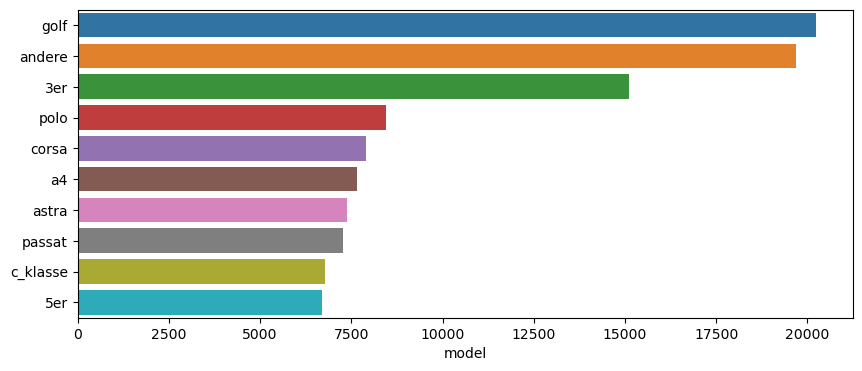

In [28]:
plt.figure(figsize=(10,4))
sns.barplot(y = models.index, x = models, orient = 'h')
plt.show()

### The month with highest number of cars registered

In [29]:
months = df.monthOfRegistration.value_counts()

In [30]:
months

3.0     28159
6.0     24851
4.0     23475
5.0     22933
7.0     21737
10.0    20803
9.0     19293
11.0    19258
12.0    19095
1.0     18582
8.0     17925
2.0     17251
Name: monthOfRegistration, dtype: int64

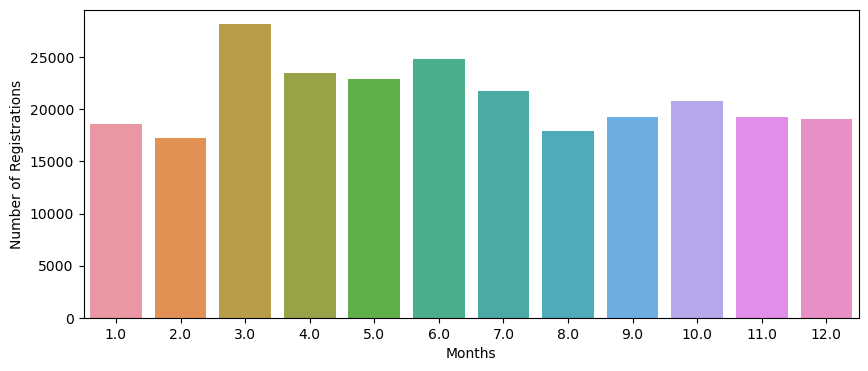

In [31]:
plt.figure(figsize=(10,4))
sns.barplot(x = months.index, y = months)
plt.xlabel('Months')
plt.ylabel('Number of Registrations')
plt.show()

### Most used fuel

In [32]:
fuels = df.fuelType.value_counts()

In [33]:
fuels

benzin     163258
diesel      85514
lpg          3802
cng           454
hybrid        213
andere         67
elektro        54
Name: fuelType, dtype: int64

In [34]:
fuels = fuels[:3]

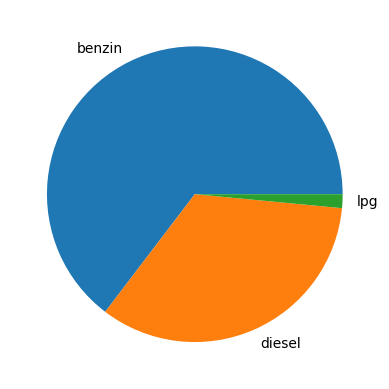

In [35]:
plt.pie(fuels, labels = fuels.index)
plt.show()

In [36]:
x = df.groupby('vehicleType')['price'].sum()

In [37]:
x

vehicleType
andere          7406047.0
bus           184472373.0
cabrio        205869702.0
coupe         307684430.0
kleinwagen    181057727.0
kombi         437590603.0
limousine     617857858.0
suv           166706283.0
Name: price, dtype: float64

In [38]:
a= df['price']
a.max()

99999999.0

In [39]:
df['kilometer'] = df['kilometer'].astype(int)
b = df['kilometer']

The correlation between price and kilometer is negative. This indicates that with increase in the number of kilometers, the price of the vehicle decreases.

In [40]:
a.corr(b)

-0.014041886274782863

In [41]:
df['yearOfRegistration'] = df['yearOfRegistration'].astype(int)
c = df['yearOfRegistration']

The correlation between price and yearOfRegistration is positive. This indicates that later the year of registration more is the price.

In [45]:
a.corr(c)

0.010370231217592436

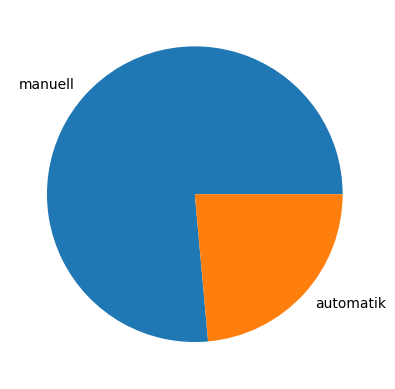

In [49]:
gear = df.gearbox.value_counts()
plt.pie(gear, labels = gear.index)
plt.show()

## Justification of selection of  features

The features selected must be able to predict the price of the vehicle.

The features selected are 
1. _Vehicle Type_ <br>
From observation we can see that some vehicle types are more popular than others. Popular vehicle types usually have a higher price.

2. _Year of Registration_ <br>
Correlating the year of registration to the price, we see that it has a positive coefficient. The more recent the vehicle is, higher is the price.
 
3. _Gearbox_ <br>
From observation, we see that more people prefer manual over automatic. Therefore manual models are priced higher than automatic due to popularity.

4. _Model_ <br>
From observation we can see that some models are more popular than others. Popular models usually have a higher price.

5. _Fuel Type_ <br>
From observation, benzin is the most commonly used fuel. Therefore the price of benzin powered vehicles might be lesser than the rest. We can predict the price based on the fuel type.

6. _Brand_ <br>
Some brands are more popular than others and will increase the price consequently.

7. _Last seen_<br>
Vehicles that have a recent 'lastSeen' date have a greater chance of being sold and can be used to predict the price.

### Potential challenges or limitations

### 1. Missing or incomplete data
Missing or incomplete data affects the accuracy of the model. Important metrics such as average/mean, max, min may become faulty. This challenge can be overcome by 
1. Deleting the entire row where the data is missing
2. The mean of the column becomes the value.(Mode or median can also be used)
3. The data is changed to zero.

<br>There are other techniques that can solve this problem like k-nearest neighbours.

### 2. Outliers
These data are drastically different from the rest of the data. They affect the aaccuracy and working of the model. Metrics such as mean,median,mode will be influenced.
<br>These data are usually due to a fault in data collection.
They can be visualized through scatter plots

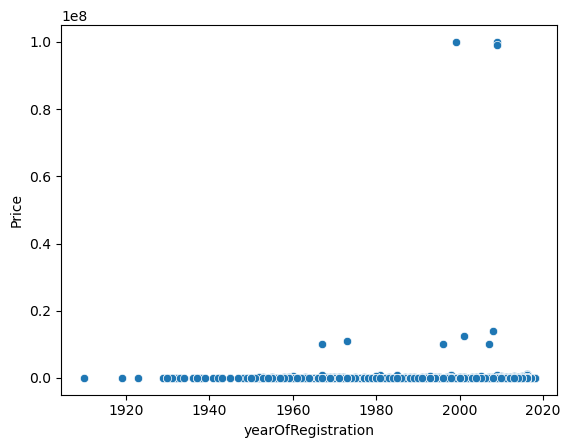

In [52]:
sns.scatterplot(x='yearOfRegistration', y='price', data=df)
plt.xlabel("yearOfRegistration")
plt.ylabel("Price");

### Model that would be able to best fit the features.


Some of the machine learning models are<br>
1. Classification models <br>
For the given problem statement, we cannot use classification model as they are used to predict the class of a given input such as filtering a message as spam.<br> <br>
2. Clustering models<br>
Clustering is often used for data that is not labelled.Here we have a specific outcome to predictn and hence cannot be used.<br><br>
3. <b>Regression models</b><br>
Based on the inputs we have and the problem statement to predict the price of the used car, we can use a regression model.
Regression models use relationships between variables from the training set to predict the prices of the testing set.
<br>
In regression learning we can use linear regresion model. It forms a linear relationship between the selected features and price of the car. We can assess the accuracy using techniques such as mean squared error (MSE) and root mean squared error (RMSE).